<a href="https://colab.research.google.com/github/Hrotich/HRK/blob/main/DSC_CORE_WEEK2_IP_HARON_ROTICH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSC WEEK1 WORKINGS

# DEFINING THE QUESTION

a) Specifying the Question
Which group of individual more access to bank account service?

b) Defining the success metrics

c) Understanding the context

d) The experimental design and recordings

e) Appropriateness of data and  relevance


---



2 . READING DATASET


In [176]:
# read dataset given
 #Importing Pandas
# 
import pandas as pd
# importing numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

 #Importing Matplotlib
#
import matplotlib.pyplot as plt
url=" http://bit.ly/FinancialDataset"
df = pd.read_csv("http://bit.ly/FinancialDataset")


3. checking dataset

In [60]:
# to preview the dataset , top set
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# to previet  bottom of dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# to identify number of records
df.shape

(23524, 13)

In [6]:
# to check for appropriate datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# 4. External Data Source Validation



5. TIDYING OF DATASET

In [13]:
 #checking for anomalies
 Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


In [61]:
# to deal with outliers
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(22903, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


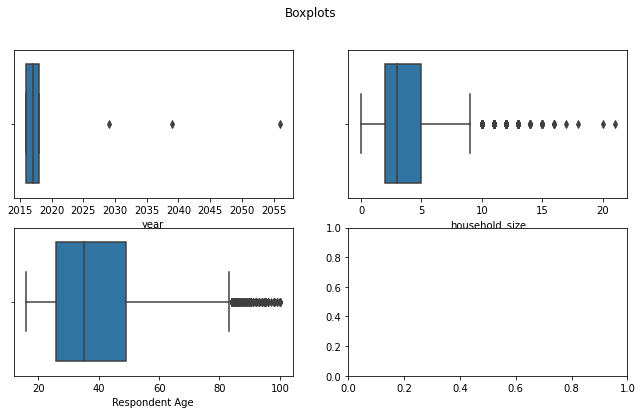

In [19]:
# TO check for outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(11, 6))
fig.suptitle('Boxplots')
sns.boxplot(df['year'], ax=ax1)
sns.boxplot(df['household_size'], ax=ax2)
sns.boxplot(df['Respondent Age'], ax=ax3)

In [177]:
# to check for missing data

#
df.isnull().values.any()

True

In [178]:
# To drop null values
df.dropna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [179]:
# to check for duplicates
df.duplicated()
df.drop_duplicates()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [180]:
# to rename columns
df.rename(columns = {'Has a Bank Account' : 'Has_bank_account', 'Respondent Age' : 'Age', 'Level of Education':'Level_of_Education'}, inplace = True)

In [181]:
# to drop unnecessary columns
df.drop(['The relathip with head', 'uniqueid'], axis='columns', inplace=True)


In [120]:
df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


UNIVARIATE EXPLORATOTY DATA ANALYSIS


In [68]:
# creatin FREQUENCY dataframe
frequency_df = pd.DataFrame(df, columns=['Type of Location', 'marital_status','Has a Bank Account','Cell Phone Access','Level of Educuatio'])
frequency_df

# Creating our frequency table
# ---
frequency_df.marital_status.value_counts()

Married/Living together    10739
Single/Never Married        7971
Widowed                     2702
Divorced/Seperated          2072
Dont know                      8
Name: marital_status, dtype: int64

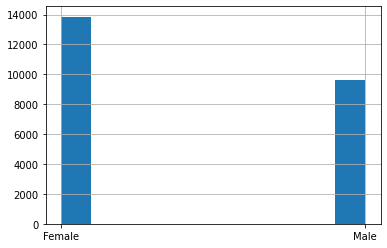

In [69]:
# plotting univariate summaries
#histogram
df['gender_of_respondent'].hist()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


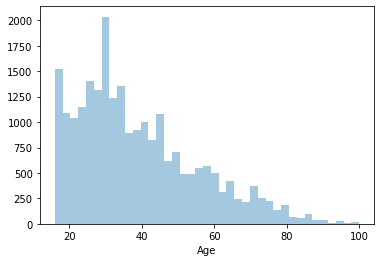

In [72]:
#boxplot
sns.distplot(df.Age.dropna(), kde=False, bins = 39);

In [77]:

 #Finding the mean
df["Age"].mean()

38.804299702000854

In [78]:
# find mean of households
df["household_size"].mean()

3.6818181818181817

In [79]:
# to find median for age
df["Age"].median()

35.0

In [80]:
#median household
df["household_size"].median()

3.0

In [81]:
# finding mode
df["Age"].mode()

0    30.0
dtype: float64

In [82]:
# finding mode\
df["year"].mode()

0    2016
dtype: int64

In [83]:
# finding mode of age
df["Age"].mode()

0    30.0
dtype: float64

MEASURE OF SPREAD

In [84]:
#Finding the standard deviation for age
df["Age"].std()

16.51999610879876

In [85]:
#Finding the standard deviation for households size
df["household_size"].std()

2.279933399631944

In [86]:
#Finding the variance of age
df["Age"].var()

272.9102714347262

In [87]:
#finding the variance of the herbicide average prices
df["household_size"].var()

5.198096306757275

In [89]:
# Finding  Range of age
df_max = df["Age"].max()
df_min = df["Age"].min()

# Calculating the range
df_max - df_min

84.0

In [90]:
# to find range of  households
df_max = df["household_size"].max()
df_min = df["household_size"].min()

# Calculating the range
df_max - df_min

21.0

In [92]:
# to find Quartiles
#Finding the quantiles of the  AGE
df["Age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Age, dtype: float64

In [94]:
# Determining the skeweness
df["Age"].skew()
#the age is positively skewed

0.8418012375387167

In [95]:
# to determining the kurtosis 
df["Age"].kurt()

0.10110811880734305

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


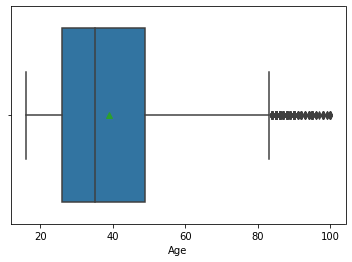

In [96]:
# boxplot for age
sns.boxplot(df["Age"], showmeans=True)

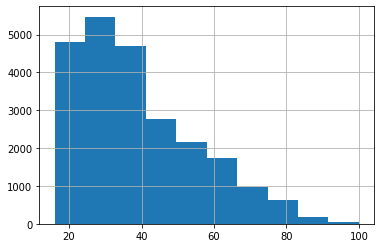

In [97]:
df['Age'].hist()

BIVARIATE ANALYSIS

Scatterplot

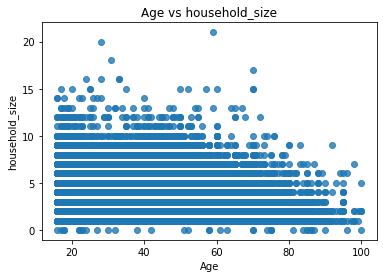

In [103]:
# age scatter plot
# to show how household size  compares to age
sns.regplot(x = df["Age"], y = df["household_size"], fit_reg=False)

 #Giving our scatterplot a title
plt.title('Age vs household_size')

# Labelling our x axis
plt.xlabel('Age')

# Labelling our y axis
plt.ylabel('household_size')

# We then display our scatterplot as shown below
plt.show()


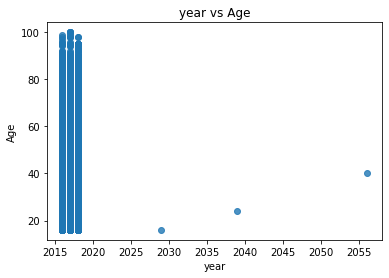

In [106]:
#   scatter plot  to show correlation between year and age
sns.regplot(x = df["year"], y = df["Age"], fit_reg=False)

#Giving our scatterplot a title
plt.title("year vs Age")

# Labelling our x axis
plt.xlabel("year")

# Labelling our y axis
plt.ylabel("Age")

# We then display our scatterplot as shown below
plt.show()
#


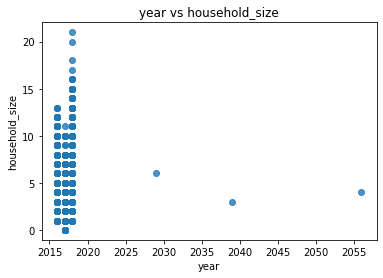

In [110]:
# 
#households size vs year scatter plot
# to show relationship  between household size  vs year
sns.regplot(x = df["year"], y = df["household_size"], fit_reg=False)

# Giving our scatterplot a title
plt.title("year vs household_size")

# Labelling our x axis
plt.xlabel("year")

# Labelling our y axis
plt.ylabel("household_size")

# We then display our scatterplot as shown below
plt.show()
#

CORRELATION 



In [182]:
#  Calculating the pearson coefficient for year vs household
pearson_coeff = df["year"].corr(df["household_size"], method="pearson") 


# Checking whether you have to define the pearson
coeff = df["year"].corr(df["household_size"]) 
print(coeff)

-0.04934365032853075


In [114]:
  #Calculating the pearson coefficient for year vs household
pearson_coeff = df["year"].corr(df["Age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["year"].corr(df["Age"]) 
print(coeff)

-0.01956987264962113
-0.01956987264962113


In [115]:
  #Calculating the pearson coefficient for year vs household
pearson_coeff = df["Age"].corr(df["household_size"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["Age"].corr(df["household_size"]) 
print(coeff)

-0.1197092971464233
-0.1197092971464233


STACKEDCHART COLUMN


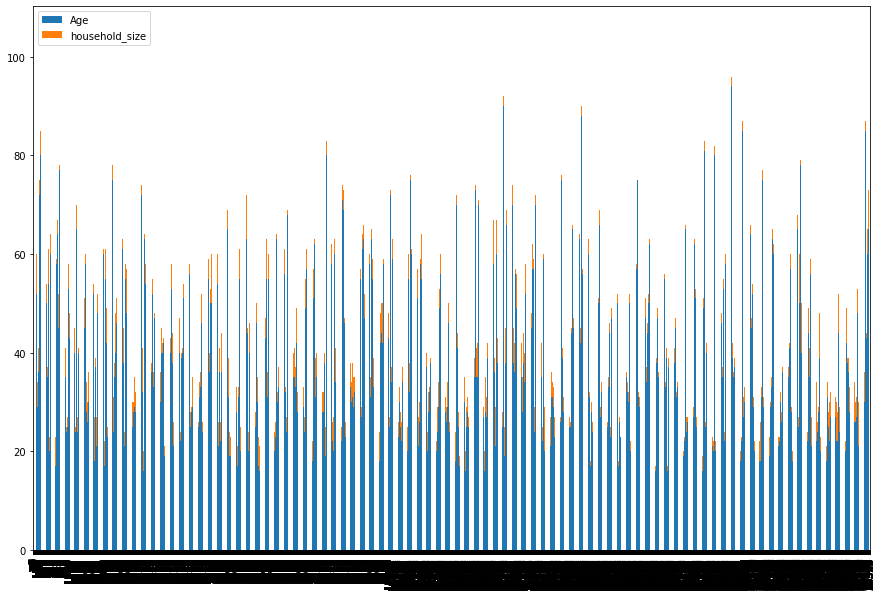

In [133]:
df[['Age','household_size']].plot(kind='bar', figsize=(15, 10), stacked=True)

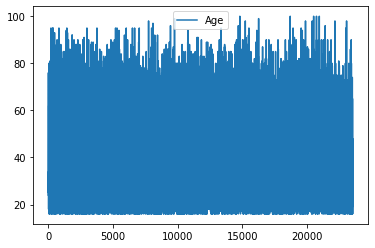

In [132]:
 #Plotting our line graph
df[["Age"]].plot()

# MULTIVARIATE ANALYSIS

In [134]:
# preview data
df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


lenear Discriminant ANALYSIS

In [151]:
# 1: Once dataset is loaded into a pandas data frame object, the first step is to divide dataset 
# The code assigns the first four columns of the dataset i.e. the feature set to X variable 
# while the values in the fifth column (labels) are assigned to the y variable.
#
X = df.iloc[:, 5:6].values
y = df.iloc[:, 6].values

In [153]:
#  2 : The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [185]:
# 3: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
#


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [186]:
# performing LDA
#It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

ValueError: ignored

Challenging solutions


# insights

1. To do more research on  appllication of multivariate analysis  especilly the linear discriminant analysis
